# Control del doble integrador

In [1]:
import numpy as np
import control as ctrl
from matplotlib import pyplot as plt

In [4]:
s = ctrl.TransferFunction.s

G = 1/s**2
T = 1

H = ctrl.sample_system(G,Ts=T,method='zoh')
print('Sistema discretizado ',H)

Sistema discretizado  
 0.5 z + 0.5
-------------
z^2 - 2 z + 1

dt = 1



# Control proporcional

(-1.0, 1.0)

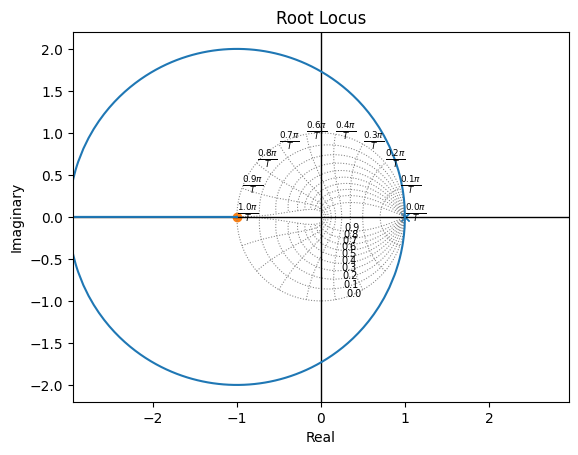

In [16]:
# Primero vemos el rootlocus
_ = ctrl.root_locus(H)
plt.xlim(-1,1)

# Da inestable siempre!
# Lo que es esperable, ya que el doble integrador necesita un término de amortiguamiento aún en el sistema continuo

# Control PD

Realimentamos posición y velocidad por ejemplo

El controlador es

$$ u_k = K_p (r_k-y_k) - K_p T_d \dot{y}_k$$

Tengo aceleración que integrado da velocidad que integrado da posición. La entrada es la aceleración. Por lo que la derivada de la velocidad es u
$$\frac{d\dot{y}}{dt} = u$$
Como $u(t)$ es constante durante el intervalo de muestreo (recordemos que es la salida de nuestro control digital)
$$\dot{y}_{k+1}-\dot{y}_{k} = u_k$$

Resulta:
$$ \dot{y}_k =\frac{1}{q-1} u_k$$

Reemplazando en la ley de control:
$$ u_k = K_p (r_k-y_k) - K_p T_d \frac{1}{q-1} u_k$$
Agrupamos $u_k$ e $y_k$
$$ (1+ K_p T_d \frac{1}{q-1}) u_k  = K_p e_k $$
$$ \frac{q-1 + K_p T_d}{q-1} u_k  = K_p e_k $$
Despejamos el controlador
$$ C(q) = K_p \frac{q-1}{q-1 + K_p T_d}   $$

Recordando el operador transferencia de la planta
$$ G(q) =\frac{0.5(q+1)}{(q-1)^2}$$

Y el operador transferencia del camino directo es
$$ CG(q) = K_p\frac{0.5(q+1)}{(q-1)(q-1 + K_p T_d)} $$



Ganancia: 0.5
Polos de lc: [1. +0.j  0.5+0.5j 0.5-0.5j]
Ceros: [ 1.+0.j -1.+0.j] 
Controlador:  
0.5 z - 0.5
-----------
 z - 0.25

dt = 1

1 states have been removed from the model
Sistema de lazo cerrado:  
0.25 z + 0.25
-------------
z^2 - z + 0.5

dt = 1

Ganancia: 0.75
Polos de lc: [1.  +0.j        0.25+0.4330127j 0.25-0.4330127j]
Ceros: [ 1.+0.j -1.+0.j] 
Controlador:  
0.75 z - 0.75
-------------
  z + 0.125

dt = 1

1 states have been removed from the model
Sistema de lazo cerrado:  
 0.375 z + 0.375
------------------
z^2 - 0.5 z + 0.25

dt = 1

Ganancia: 1
Polos de lc: [ 1.00000000e+00+0.j -2.10734244e-08+0.j  2.10734241e-08+0.j]
Ceros: [ 1.+0.j -1.+0.j] 
Controlador:  
 z - 1
-------
z + 0.5

dt = 1

1 states have been removed from the model
Sistema de lazo cerrado:  
        0.5 z + 0.5
----------------------------
z^2 + 2.22e-16 z - 4.441e-16

dt = 1

Ganancia: 1.25
Polos de lc: [-0.80901699+0.j  1.        +0.j  0.30901699+0.j]
Ceros: [ 1.+0.j -1.+0.j] 
Controlador:  
1.25

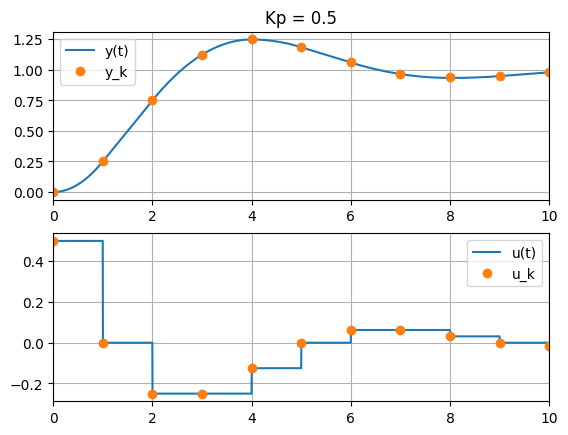

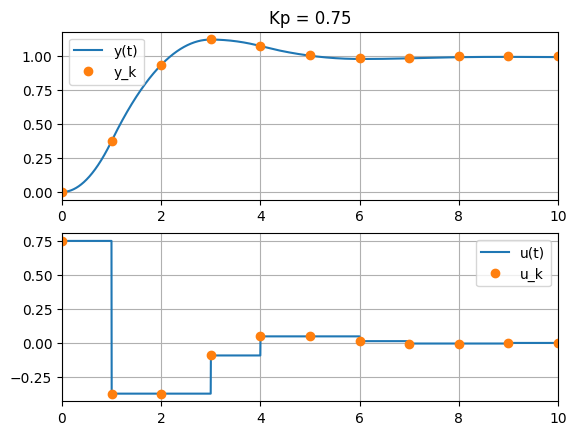

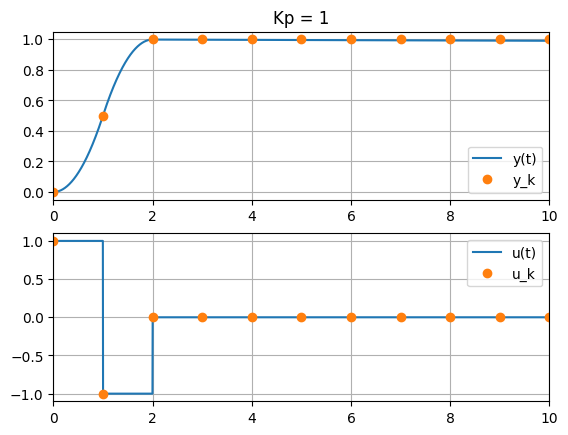

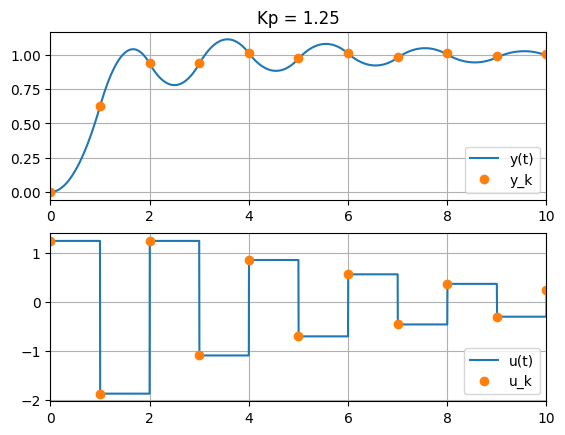

In [102]:


Kp = [0.5,0.75,1,1.25]
Td = 1.5
r = 1
i = 0
for kp in Kp:
    i+=1
    C = ctrl.TransferFunction([kp,-kp],[1,(kp*Td-1)],dt=T)        
    Hcl = ctrl.feedback(C*H,1)
    poles,zeros = ctrl.pzmap(Hcl,plot=False)
    print(f"Ganancia: {kp}\nPolos de lc: {poles}\nCeros: {zeros} ")
    print("Controlador: ",C)
    print("Sistema de lazo cerrado: ",ctrl.minreal(Hcl))

    t,y = ctrl.step_response(Hcl,T=10)
    t,u = ctrl.forced_response(C,U=r-y,T=t)
    
    # Armo los vectores para excitar el sistema de tiempo continuo (a ver qué pasa!)
    Nc=500
    u_zoh = np.repeat(u, Nc)[:-1]
    delta_t = 1/Nc
    t_u = np.linspace(t[0],t[-1]+1-delta_t,len(u_zoh))
    tc, yc = ctrl.forced_response(G, T=t_u, U=u_zoh)
    

    plt.figure(i)
    plt.subplot(211)
    plt.plot(tc,yc,label="y(t)")
    plt.plot(t,y,'o',label=f"y_k")
    plt.legend()
    plt.xlim(0,10)
    plt.grid()
    plt.title(f"Kp = {kp}")
    plt.subplot(212)
    #plt.step(t,u,where='post',label=f"Kp={kp}")
    plt.plot(t_u,u_zoh,label='u(t)')
    plt.plot(t,u,'o',label='u_k')
    plt.grid()
    plt.xlim(0,10)
    plt.legend()
